## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [608]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

pd.set_option('display.max_columns', None)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [609]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [610]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [611]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [612]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [613]:
df.query("(group == 'treatment' and landing_page != 'new_page') or (group != 'treatment' and landing_page == 'new_page')").count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


> There are no missing values in this dataset.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [615]:
df2 = df.query("(group == 'treatment' and landing_page == 'new_page') or (group != 'treatment' and landing_page != 'new_page')")

In [616]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [617]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [618]:
df2.user_id.nunique()

290584

In [619]:
df2.shape[0]

290585

b. There is one **user_id** repeated in **df2**.  What is it?

In [620]:
df2[df2.duplicated(subset='user_id', keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


> There is a user who visited the page twice at two different times.

c. What is the row information for the repeat **user_id**? 

In [621]:
df2[df2.duplicated(subset='user_id', keep=False)].index.values

array([1899, 2893])

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [622]:
df2.drop_duplicates(subset='user_id', inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [623]:
df2[df2.duplicated(subset='user_id', keep=False)].user_id.count()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [624]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [625]:
df2.query("group == 'control'").converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [626]:
df2.query("group == 'treatment'").converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [627]:
(df2.landing_page == 'new_page').mean()

0.50006194422266881

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

> It turns out that the conversion rate of the treatment group is slightly lower than the rate of the control group, suggesting that the old page leads to more conversions than the new page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

> $$H_0: p_{new} - p_{old} \le 0$$
> $$H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [628]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [629]:
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [630]:
n_new = df2.query("group == 'treatment'").user_id.count()
n_new

145310

d. What is $n_{old}$?

In [631]:
n_old = df2.query("group == 'control'").user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [632]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted.mean()

0.11924850320005506

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [633]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.12059969437063756

In [634]:
opc = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
opc.mean()

0.11957883146376712

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [635]:
new_page_converted.mean() - old_page_converted.mean()

-0.0013511911705824942

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [636]:
p_diffs = np.random.binomial(n_new, p_new, 10000) / n_new - np.random.binomial(n_old, p_old, 10000) / n_old
p_diffs = np.array(p_diffs)
p_diffs.mean()

-7.5339690258056299e-06

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

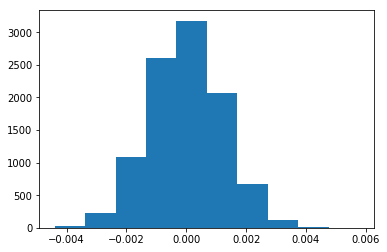

In [637]:
plt.hist(p_diffs);

> We plotted the sampling distribution of the difference under the Null, which looks normally distributed, due to Central Limit Theorem. Therefore, the plot looks as expected. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [638]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.shape[0])

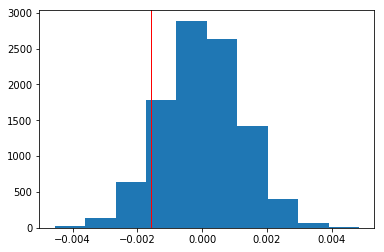

In [639]:
plt.hist(null_vals)
plt.axvline(x=df2.query("group == 'treatment'").converted.mean() - df2.query("group == 'control'").converted.mean(), color='r', linewidth=1);

In [640]:
(p_diffs > (df2.query("group == 'treatment'").converted.mean() - df2.query("group == 'control'").converted.mean())).mean()

0.90059999999999996

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> We just computed a p-value which is defined as the probability of observing a statistc (or more extreme in favour of the alternative) from the Null Hypthesis, given the Null Hypothesis is true. Approximately 90% of the differences are larger than the observed difference, if the Null Hypothesis is true.  

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [641]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'").converted.sum()
convert_new = df2.query("group == 'treatment'").converted.sum()
n_old = df2.query("group == 'control'").user_id.count()
n_new = df2.query("group == 'treatment'").user_id.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [642]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

> Since the absolute value of the z-score does not exceed the critical value of 1.96, and the p-value is greater than 0.05, we do not reject the null hypothesis that the old page is better than or as good as the new one in terms of conversions. The p-values of the two methods are approximately identical.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> Logistic Regression, as we are looking at Binary Classification.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [643]:
dummies = pd.get_dummies(df2.group)
df2['intercept'] = 1
df2['ab_page'] = dummies.treatment

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [644]:
log_reg = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
res = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [645]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        14:50:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

> The p-value associated with ab_page is 0.19.
>
> The hyptheses associated with our regression model are the following:  
> $H_0:$ The page we use is not associated with the conversion rate.  
> $H_1:$ The page we use is associated with the conversion rate.
>
> In Part II, we asked whether one page is better than the other one, i.e.  
> $H_0: p_{new} - p_{old} \le 0$  
> $H_1: p_{new} - p_{old} > 0$
>
> This generated a much higher p-value. The two values differ, as we are looking at two different types of hypotheses. It seems, that it is more likely, that there is some kind of relation between the variables than the new site is better than the old one.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> It is i good idea, to consider multiple factors into the regression model, as there can be more than one relationships between variables.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [646]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [647]:
df3 = df2.merge(df_countries, on='user_id', how='inner')

In [648]:
df_country_dummies = pd.get_dummies(data=df_countries, columns=['country'])
df3 = df3.merge(df_country_dummies, on='user_id', how='inner')

In [649]:
logit_countries = sm.Logit(df3.converted, df3[['intercept', 'country_UK', 'country_US']])
res = logit_countries.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Dec 2018   Pseudo R-squ.:               1.521e-05
Time:                        14:50:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

> The p-values of both countries are above the limit of 0.05, which means they are both not statistically significant for predicting conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [650]:
logit_all = sm.Logit(df3.converted, df3[['intercept', 'ab_page', 'country_UK', 'country_US']])
res = logit_all.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 20 Dec 2018   Pseudo R-squ.:               2.323e-05
Time:                        14:50:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

> We now added ab_page, but still, all three variables have a p-value above 0.05 and are therefore not significant for predicting conversion.

Let's look at more variables, i.e. day and time of page hit.

In [651]:
df3.timestamp.min(), df3.timestamp.max()

('2017-01-02 13:42:05.378582', '2017-01-24 13:41:54.460509')

The A/B test was conducted between Jan 02 and Jan 24. We can use these 23 days for our prediction. In the next steps we will extract day and hour from the dataframe.

In [652]:
df_base = df3

In [653]:
from datetime import datetime as dt
df_base['day'] = df_base.timestamp.map(lambda x: dt.strptime(x, '%Y-%m-%d %H:%M:%S.%f').day) #extract day
df_base['hour'] = df_base.timestamp.map(lambda x: dt.strptime(x, '%Y-%m-%d %H:%M:%S.%f').hour) #extract hour

In [654]:
df_base.drop(['group', 'landing_page', 'timestamp', 'country'], axis=1, inplace=True) #drop unused columns
df_base.head()

,user_id,converted,intercept,ab_page,country_CA,country_UK,country_US,day,hour
0,851104,0,1,0,0,0,1,21,22
1,804228,0,1,0,0,0,1,12,8
2,661590,0,1,1,0,0,1,11,16
3,853541,0,1,1,0,0,1,8,18
4,864975,1,1,0,0,0,1,21,1


Let's transform day and hour to dummy variables.

In [655]:
df_hr = pd.get_dummies(df_base, columns=['day', 'hour'])
df_hr.head()

,user_id,converted,intercept,ab_page,country_CA,country_UK,country_US,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,851104,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,804228,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,661590,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,853541,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,864975,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Also create dummy variables for time of the day, i.e. morning, afternoon, evening, night.

In [656]:
df_dt = pd.get_dummies(df_base, columns=['day'])
# Generate new dummy features from hour
df_dt['daytime'] = df_dt.hour.map(lambda x: 'night' if x < 6 else ('morning' if x < 12 else ('afternoon' if x < 18 else 'evening')))
df_dt = pd.get_dummies(df_dt, columns=['daytime'])
df_dt.drop(['hour'], axis=1, inplace=True)
df_dt.head()

,user_id,converted,intercept,ab_page,country_CA,country_UK,country_US,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,daytime_afternoon,daytime_evening,daytime_morning,daytime_night
0,851104,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,804228,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,661590,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,853541,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,864975,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


Apply logistic regression to both datasets.

In [657]:
y = df_hr.converted
X_labels = ['intercept', 'ab_page',
       'country_UK', 'country_US', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
       'day_21', 'day_22', 'day_23', 'day_24', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23']
X = df_hr[X_labels]

In [658]:
logit_model = sm.Logit(y, X)
res = logit_model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366014
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290535
Method:                           MLE   Df Model:                           48
Date:                Thu, 20 Dec 2018   Pseudo R-squ.:               0.0002936
Time:                        14:50:59   Log-Likelihood:            -1.0636e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.07817
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0016      0.056    -35.558      0.000      -2.112      -1.891
ab_page       -0.0151      0.011     -1.323      0.186      -0.038       0.007
country_UK     0.0512      0.028      1.803      0.071      -0.004       0.107
country_US     0.0410      0.027      1.523      0.128      -0.012       0.094
day_3         -0.0772      0.049     -1.570      0.116      -0.174       0.019
day_4         -0.0239      0.049     -0.487      0.626      -0.120       0.072
day_5         -0.0263      0.049     -0.535      0.592      -0.122       0.070
day_6         -0.0223      0.049     -0.456      0.648      -0.118       0.073
day_7         -0.0307      0.049     -0.627      0.531      -0.127       0.065
day_8         -0.0193      0.049     -0.397      0.692      -0.115       0.076
day_9         -0.0279      0.049     -0.570      0.568      -0.124       0.068
day_10        -0.0206      0.049     -0.422      0.673      -0.116       0.075
day_11        -0.0463      0.049     -0.947      0.344      -0.142       0.050
day_12         0.0035      0.049      0.073      0.942      -0.092       0.099
day_13        -0.0743      0.049     -1.507      0.132      -0.171       0.022
day_14         0.0108      0.049      0.221      0.825      -0.085       0.106
day_15        -0.0458      0.049     -0.935      0.350      -0.142       0.050
day_16        -0.0122      0.049     -0.249      0.803      -0.108       0.084
day_17         0.0298      0.049      0.613      0.540      -0.066       0.125
day_18         0.0275      0.049      0.565      0.572      -0.068       0.123
day_19        -0.0305      0.049     -0.622      0.534      -0.126       0.066
day_20        -0.0508      0.049     -1.036      0.300      -0.147       0.045
day_21        -0.0091      0.049     -0.186      0.852      -0.105       0.086
day_22        -0.0307      0.049     -0.628      0.530      -0.127       0.065
day_23         0.0147      0.049      0.301      0.763      -0.081       0.110
day_24        -0.0123      0.055     -0.224      0.823      -0.120       0.096
hour_1        -0.0650      0.040     -1.624      0.104      -0.144       0.013
hour_2        -0.0681      0.040     -1.693      0.090      -0.147       0.011
hour_3        -0.0511      0.040     -1.276      0.202      -0.130       0.027
hour_4        -0.0601      0.040     -1.494      0.135      -0.139       0.019
hour_5         0.0050      0.040      0.127      0.899      -0.072       0.082
hour_6         0.0090      0.040      0.226      0.821      -0.069       0.087
hour_7        -0.0264      0.040     -0.662      0.508      -0.104       0.052
hour_8        -0.0184      0.040     -0.463      0.643      -0.096       0.060
hour_9         0.0449      0.039      1.138      0.255      -0.032       0.122
hour_10       -0.0266      0.040     -0.668      0.504      -0.105       0.051
hour_11        0.0231      0.039      0.586      0.558      -0.054       0.100
hour_12        0.0328      0.039      0.833      0.405      -0.044       0.110
ho

In [659]:
y = df_dt.converted
X_labels = ['intercept', 'ab_page',
       'country_UK', 'country_US', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
       'day_21', 'day_22', 'day_23', 'day_24', 'daytime_afternoon',
       'daytime_evening', 'daytime_morning']
X = df_dt[X_labels]

In [ ]:
logit_model = sm.Logit(y, X)
res = logit_model.fit()
res.summary()

> For both models the p-values indicate that none of the computed features are significant.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])